In [14]:
import numpy as np
import mdtraj as md
from matplotlib import pyplot as plt

## Phi and Psi dihedrals calculatioin by numpy

In [15]:
# Plot traj A
def plot_prop_vs_time(prop, time, legend):
    plt.plot(time, prop, label=legend, alpha=0.5)
    plt.xlabel('Time (ps)')
    plt.ylabel('Angle (radians)')
    plt.legend(loc='upper right')

In [16]:
colvar_a = np.loadtxt('../Data/COLVAR_A', comments='#')
colvar_b = np.loadtxt('../Data/COLVAR_B', comments='#')

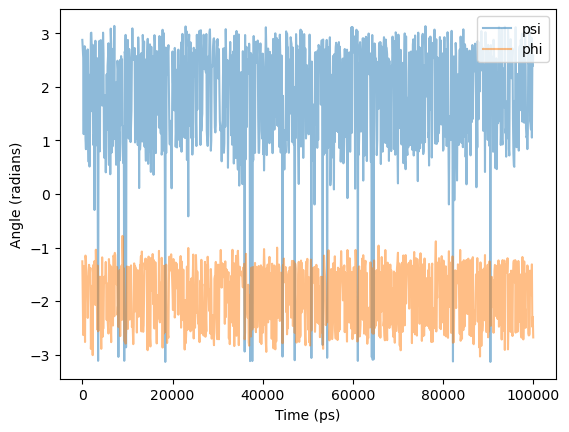

In [22]:
plot_prop_vs_time(colvar_a[:, 2], colvar_a[:, 0], 'psi')
plot_prop_vs_time(colvar_a[:, 1], colvar_a[:, 0], 'phi')

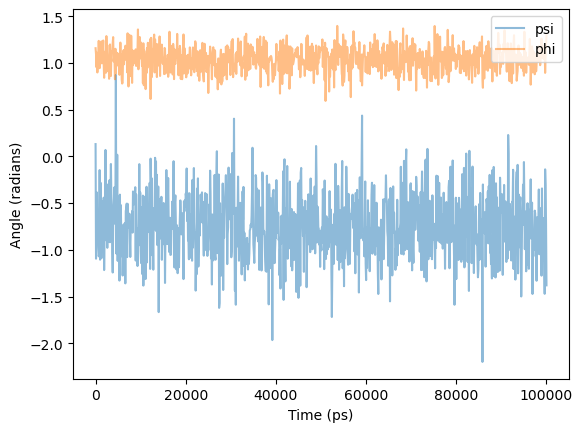

In [23]:
plot_prop_vs_time(colvar_b[:, 2], colvar_b[:, 0], 'psi')
plot_prop_vs_time(colvar_b[:, 1], colvar_b[:, 0], 'phi')

## Phi and Psi dihedrals calculation by mdtraj

In [18]:
def phi_psi_cal_plot(xtc, pdb):
    
    traj = md.load(xtc, top=pdb)

    # compute phi and psi angles
    phi_indices, phi_angles = md.compute_phi(traj)
    psi_indices, psi_angles = md.compute_psi(traj)

    # plot phi and psi angles vs time
    plot_prop_vs_time(psi_angles, traj.time, 'psi')
    plot_prop_vs_time(phi_angles, traj.time, 'phi')

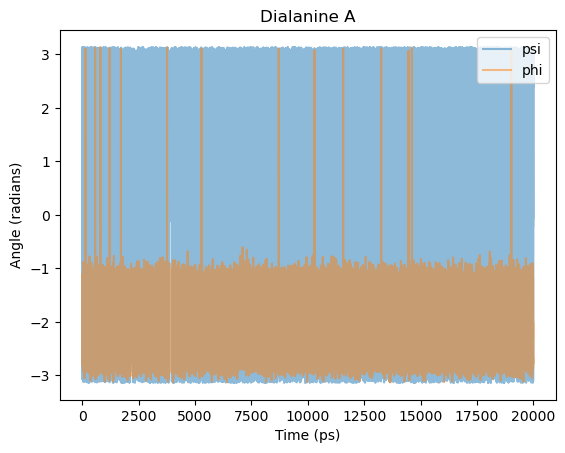

In [19]:
phi_psi_cal_plot('../Data/md_A.xtc', '../Inputs/dialaA.pdb')
plt.title('Dialanine A')
plt.savefig('../Figures/A_phi_psi_time_mdtraj.png', dpi=300)

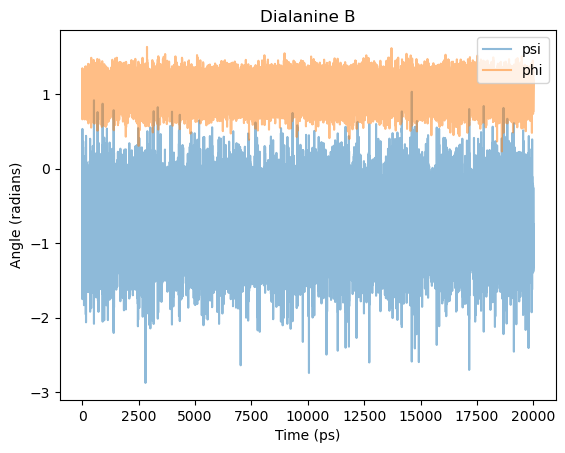

In [20]:
phi_psi_cal_plot('../Data/md_B.xtc', '../Inputs/dialaB.pdb')
plt.title('Dialanine B')
plt.savefig('../Figures/B_phi_psi_time_mdtraj.png', dpi=300)